# <center> Bootstrap TP1
<b>Antoine GRELETY</b>
<b>Vincent LE MEUR</b>

## Importation des librairies et des données

In [1]:
import numpy as np
import numpy.random as npr
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import norm
import math

In [4]:
#law=pd.read_csv("/Users/antoinegrelety/Documents/ENSAE/S2_Bootstrap/TP1/lsat.dat")
law=pd.read_table("lsat.dat",sep=" ")

In [3]:
law.head()

,LSAT,GPA
0,576,3.39
1,635,3.30
2,558,2.81
3,578,3.03
4,666,3.44


In [4]:
n=law.shape[0]

In [5]:
LSAT=np.array(law["LSAT"])
GPA=np.array(law["GPA"])

In [6]:
law=np.array(law)

## Partie 1 :  Estimateurs bootstrap

### Estimateur bootstrap de la variance de la corrélation

In [147]:
ind=npr.randint(0,n,15)
print(ind)

[3 5 5 8 7 2 1 2 7 2 2 9 2 1 9]


In [148]:
sample=law[ind,:]

In [2]:
B=200
corr_star=np.zeros(B)
for b in range(B):
    ind=npr.randint(0,n,15)
    sample_b=law[ind,:]
    corr_star[b]=np.corrcoef(LSAT[ind],GPA[ind])[0,1]
    #print(corr_star[b])

NameError: name 'n' is not defined

In [150]:
print("estimateur bootstrap:",np.var(corr_star))

estimateur bootstrap: 0.0169684904212


### Médiane

In [25]:
#Z_size=[100,1000,10000]
Z_size=[10]
B=10000

for c in Z_size:
    Z=npr.exponential(size=c)
    med_star=np.zeros(B)
    med=np.zeros(B)
    for b in range(B):
        ind=npr.randint(0,len(Z),len(Z))
        sample_b=Z[ind]
        med_star[b]=np.median(sample_b)
    print(np.var(med_star))

0.0705616341882


### Estimation de la fonction de répartition

In [26]:
Z=npr.exponential(size=10)
med_Z=np.median(Z)

Fonction de répartition de la médiane empirique

In [27]:
M=10000
med_MC=np.zeros(M)
for m in range(M):
        Z=npr.exponential(size=10)
        med_MC[m]=np.median(Z)
print("médiane via MC:",np.mean(med_MC))

médiane via MC: 0.746615197946


Fonction de répartition de l'approximation asymptotique gaussienne

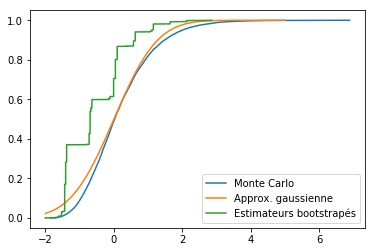

In [28]:
plt.plot(np.sqrt(len(Z))*(np.sort(med_MC)-np.log(2)),(1/M)*np.arange(M))
gridnorm=np.arange(-2,5,0.01)
plt.plot(gridnorm,norm.cdf(gridnorm))
plt.plot(np.sqrt(len(Z))*(np.sort(med_star)-med_Z),(1/B)*np.arange(B))
plt.legend(["Monte Carlo","Approx. gaussienne","Estimateurs bootstrapés"])
plt.show()

## Partie 2: intervalles de confiance

In [2]:
n=10
p=0.7
theta=0.007
q=1
kappa=0.02
alpha=0.05
tau=(p*kappa)/(q*theta)

In [3]:
X=npr.gamma(p,1/theta,size=n)
Y=npr.gamma(q,1/kappa,size=n)

In [4]:
def tau_hat(x,y):
    return(np.mean(x)/np.mean(y))

### IC par bootstrap

In [5]:
def sigma_hat(x,y):
    return  np.sqrt( np.var(x)/(np.mean(y**2)) + (np.mean(x**2)/np.mean(y**4))*np.var(y) )

In [6]:
def ICAN(alpha,X,Y):
    A= []
    A.append(tau_hat(X,Y)-sigma_hat(X,Y)/np.sqrt(n)*norm.ppf(1-alpha/2))
    A.append(tau_hat(X,Y)+sigma_hat(X,Y)/np.sqrt(n)*norm.ppf(1-alpha/2))
    return A

In [7]:
print(ICAN(alpha,X,Y))
print(tau_hat(X,Y))

[0.65047998342199498, 2.2056536196001755]
1.42806680151


In [8]:
#Bootstrap
B=1000
tau_star=np.zeros(B)
S_star=np.zeros(B)
tau_hat_val=tau_hat(X,Y)
for b in range(B):
    ind=npr.randint(0,n,n)
    sample_X=X[ind]
    sample_Y=Y[ind]
    tau_star[b]=tau_hat(sample_X,sample_Y)
    var_hat=np.var(sample_X/np.sqrt(np.var(sample_X)/np.mean(sample_Y)**2+
                                    np.mean(sample_X)*np.var(sample_Y)/np.mean(sample_Y)**4) )
    S_star[b]=np.sqrt(n)*(tau_star[b]-tau_hat_val)/np.sqrt(var_hat)

#ordonne les paramètres estimés
tau_star=np.sort(tau_star)
S_star=np.sort(S_star)

In [9]:
def IC_base(alpha,x,y,theta):
    A= []
    A.append( 2*tau_hat(x,y)-theta[math.ceil(len(theta)*(1-alpha/2))] )
    A.append( 2*tau_hat(x,y)-theta[math.ceil(len(theta)*(alpha/2))] )
    return(A)

In [10]:
print("Intervalle de confiance de base:",IC_base(alpha,X,Y,tau_star))

Intervalle de confiance de base: [0.19465066469947079, 2.2065647588127359]


In [11]:
def IC_perc(alpha,x,y,theta):
    A= []
    A.append( theta[math.ceil(len(theta)*(alpha/2))] )
    A.append( theta[math.ceil(len(theta)*(1-alpha/2))] )
    return(A)

In [12]:
print("Intervalle de confiance percentile:",IC_perc(alpha,X,Y,tau_star))

Intervalle de confiance percentile: [0.64956884420943461, 2.6614829383226999]


In [13]:
def IC_t_boot(alpha,x,y,theta):
    A= []
    sigma_F=np.sqrt( np.var(x/np.sqrt(np.var(x)/np.mean(y)**2+
                                    np.mean(x)*np.var(y)/np.mean(y)**4) ) )
    
    A.append( tau_hat(x,y) - sigma_F*theta[math.ceil(len(theta)*(1-alpha/2))]/np.sqrt(n) )
    A.append( tau_hat(x,y) - sigma_F*theta[math.ceil(len(theta)*(alpha/2))]/np.sqrt(n)  )
    return(A)

In [14]:
print("Intervalle de confiance t-bootstrap:",IC_t_boot(alpha,X,Y,S_star))

Intervalle de confiance t-bootstrap: [-0.51565114785864008, 2.2926772083574005]


### Comparaison des IC

In [92]:
#Monte Carlo M=1000
M=1000
tau_star=np.zeros(B)
S_star=np.zeros(B)
tau_hat_val=tau_hat(X,Y)

#intervalles de confiance
IC_base_list=[]
IC_perc_list=[]
IC_boot_list=[]


for m in range(M):
    print("m=",m)
    X=npr.gamma(p,1/theta,size=n)
    Y=npr.gamma(q,1/kappa,size=n)
    for b in range(B):
        ind=npr.randint(0,n,n)
        sample_X=X[ind]
        sample_Y=Y[ind]
        tau_star[b]=tau_hat(sample_X,sample_Y)
        var_hat=np.var(sample_X/np.sqrt(np.var(sample_X)/np.mean(sample_Y)**2+
                                    np.mean(sample_X)*np.var(sample_Y)/np.mean(sample_Y)**4) )
        S_star[b]=np.sqrt(n)*(tau_star[b]-tau_hat_val)/np.sqrt(var_hat)
    #ordonne les paramètres estimés
    tau_star=np.sort(tau_star)
    S_star=np.sort(S_star)
    IC_base_list.append(IC_base(alpha,X,Y,tau_star))
    IC_perc_list.append(IC_perc(alpha,X,Y,tau_star))
    IC_boot_list.append(IC_t_boot(alpha,X,Y,S_star))
    

m= 0
m= 1
m= 2
m= 3
m= 4
m= 5
m= 6
m= 7
m= 8
m= 9
m= 10
m= 11
m= 12
m= 13
m= 14
m= 15
m= 16
m= 17
m= 18
m= 19
m= 20
m= 21
m= 22
m= 23
m= 24
m= 25
m= 26
m= 27
m= 28
m= 29
m= 30
m= 31
m= 32
m= 33
m= 34
m= 35
m= 36
m= 37
m= 38
m= 39
m= 40
m= 41
m= 42
m= 43
m= 44
m= 45
m= 46
m= 47
m= 48
m= 49
m= 50
m= 51
m= 52
m= 53
m= 54
m= 55
m= 56
m= 57
m= 58
m= 59
m= 60
m= 61
m= 62
m= 63
m= 64
m= 65
m= 66
m= 67
m= 68
m= 69
m= 70
m= 71
m= 72
m= 73
m= 74
m= 75
m= 76
m= 77
m= 78
m= 79
m= 80
m= 81
m= 82
m= 83
m= 84
m= 85
m= 86
m= 87
m= 88
m= 89
m= 90
m= 91
m= 92
m= 93
m= 94
m= 95
m= 96
m= 97
m= 98
m= 99
m= 100
m= 101
m= 102
m= 103
m= 104
m= 105
m= 106
m= 107
m= 108
m= 109
m= 110
m= 111
m= 112
m= 113
m= 114
m= 115
m= 116
m= 117
m= 118
m= 119
m= 120
m= 121
m= 122
m= 123
m= 124
m= 125
m= 126
m= 127
m= 128
m= 129
m= 130
m= 131
m= 132
m= 133
m= 134
m= 135
m= 136
m= 137
m= 138
m= 139
m= 140
m= 141
m= 142
m= 143
m= 144
m= 145
m= 146
m= 147
m= 148
m= 149
m= 150
m= 151
m= 152
m= 153
m= 154
m= 155
m= 156
m= 157
m= 1

In [93]:
#crée listes contenant les IC de chaque méthode, pour chaque itération de Monte Carlo m=1...M
inf_base=np.zeros(M)
inf_perc=np.zeros(M)
inf_boot=np.zeros(M)
sup_base=np.zeros(M)
sup_perc=np.zeros(M)
sup_boot=np.zeros(M)

for m in range(M):
    inf_base[m]= IC_base_list[m][0]
    inf_perc[m]= IC_perc_list[m][0]
    inf_boot[m]= IC_boot_list[m][0]
    sup_base[m]= IC_base_list[m][1]
    sup_perc[m]= IC_perc_list[m][1]
    sup_boot[m]= IC_boot_list[m][1]

In [94]:
#comparaison des bornes inf moyennes pour chacune des méthodes de calcul des IC
print(" borne inf IC base",np.mean(inf_base),"\n borne inf IC percentile",np.mean(inf_perc),
      "\n borne inf IC bootstrap",np.mean(inf_boot))

 borne inf IC base -0.94685503511 
 borne inf IC percentile 0.918323106093 
 borne inf IC bootstrap -3.95208769482


In [95]:
#comparaison des bornes sup moyennes pour chacune des méthodes de calcul des IC
print(" borne sup IC base",np.mean(sup_base),"\n borne sup IC percentile",np.mean(sup_perc),
      "\n borne sup IC bootstrap",np.mean(sup_boot))

 borne sup IC base 3.58920728504 
 borne sup IC percentile 5.45438542625 
 borne sup IC bootstrap 3.72109410049


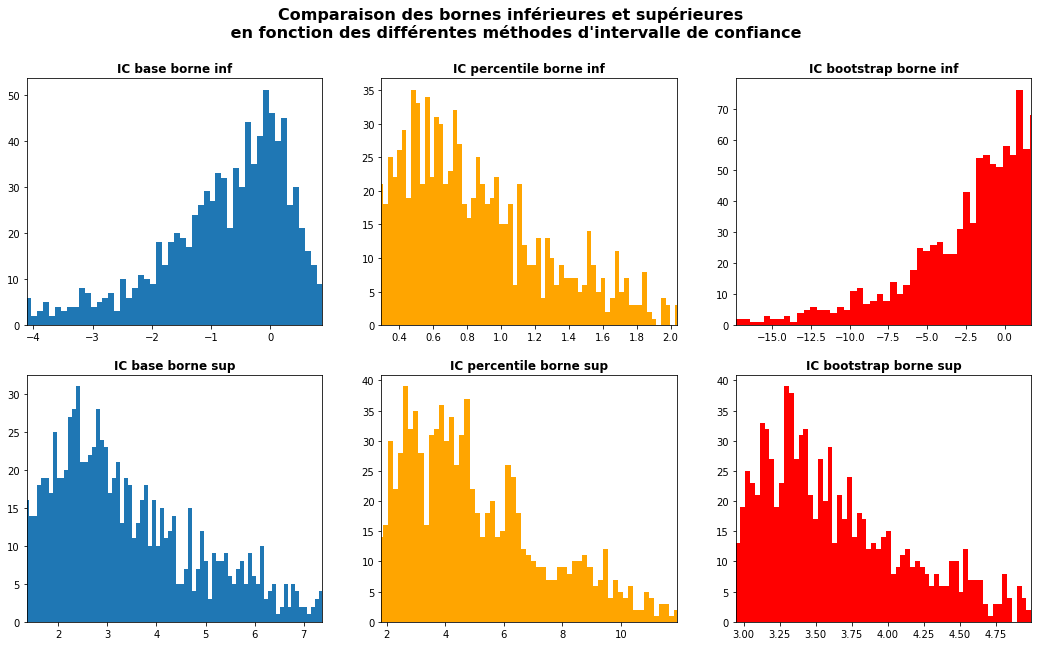

In [129]:
fig=plt.figure(figsize=(18,10))

plt.suptitle("Comparaison des bornes inférieures et supérieures \n en fonction des différentes méthodes d'intervalle de confiance",
            fontweight='bold',size=16)

plt.subplot(231)
plt.hist(inf_base,bins=200)
plt.xlim(np.percentile(inf_base,5),np.percentile(inf_base,95))
plt.title("IC base borne inf",fontweight='bold')

plt.subplot(232)
plt.hist(inf_perc,bins=200,color='orange')
plt.xlim(np.percentile(inf_perc,5),np.percentile(inf_perc,95))
plt.title("IC percentile borne inf",fontweight='bold')

plt.subplot(233)
plt.hist(inf_boot,bins=200,color='red')
plt.xlim(np.percentile(inf_boot,5),np.percentile(inf_boot,95))
plt.title("IC bootstrap borne inf",fontweight='bold')

plt.subplot(234)
plt.hist(sup_base,bins=200)
plt.xlim(np.percentile(sup_base,5),np.percentile(sup_base,95))
plt.title("IC base borne sup",fontweight='bold')

plt.subplot(235)
plt.hist(sup_perc,bins=200,color='orange')
plt.xlim(np.percentile(sup_perc,5),np.percentile(sup_perc,95))
plt.title("IC percentile borne sup",fontweight='bold')

plt.subplot(236)
plt.hist(sup_boot,bins=200,color='red')
plt.xlim(np.percentile(sup_boot,5),np.percentile(sup_boot,95))
plt.title("IC bootstrap borne sup",fontweight='bold')

plt.show()

### Tests par bootstrap

On teste: $H_{0}: \tau=2$

* Niveaux de tests par IC

In [208]:
X=npr.gamma(p,1/theta,size=n)
Y=npr.gamma(q,1/kappa,size=n)

In [209]:
#Bootstrap
tau_star=np.zeros(B)
S_star=np.zeros(B)
tau_hat_val=tau_hat(X,Y)
for b in range(B):
    ind=npr.randint(0,n,n)
    sample_X=X[ind]
    sample_Y=Y[ind]
    tau_star[b]=tau_hat(sample_X,sample_Y)
    var_hat=np.var(sample_X/np.sqrt(np.var(sample_X)/np.mean(sample_Y)**2+
                                    np.mean(sample_X)*np.var(sample_Y)/np.mean(sample_Y)**4) )
    S_star[b]=np.sqrt(n)*(tau_star[b]-tau_hat_val)/np.sqrt(var_hat)

#ordonne les paramètres estimés
tau_star=np.sort(tau_star)
S_star=np.sort(S_star)

In [210]:
#H_0: tau=2
#calculons les p-value pour chaque IC
def p_value(x,y,theta_0,S_star):
    theta_hat=tau_hat(x,y)
    sigma_F=np.sqrt( np.var(x/np.sqrt(np.var(x)/np.mean(y)**2+
                                    np.mean(x)*np.var(y)/np.mean(y)**4) ) )
    S_bar=np.sqrt(n)*(theta_hat-theta_0)/sigma_F
    return( ( len(S_star[S_star > S_bar])+1 ) / (B+1) )

In [211]:
theta_0=2
p_value=p_value(X,Y,theta_0,S_star)
print(p_value)

0.2777222777222777


In [213]:
print("Intervalle de confiance de base avec p-value:",IC_base(p_value,X,Y,tau_star))

Intervalle de confiance de base avec p-value: [0.52900128320381512, 6.3034639609728877]


In [189]:
print("Intervalle de confiance percentile avec p-value:",IC_perc(p_value,X,Y,tau_star))

Intervalle de confiance percentile avec p-value: [2.4825500092340236, 6.5584815512237657]


In [190]:
print("Intervalle de confiance t-bootstrap avec p-value:",IC_t_boot(p_value,X,Y,S_star))

Intervalle de confiance t-bootstrap avec p-value: [-0.17318356922299527, 5.0411091352439428]


* Puissance des tests $H_{1}: \tau=3$

In [152]:
p=0.7
theta=0.007
q=1
kappa=0.03
alpha=0.05

In [153]:
p*kappa/(q*theta)

2.9999999999999996

In [156]:
#puissance = proba que H_0 soit rejeté et que H_0 soit faux (vrai négatif) = 1 -  beta
#Pour chaque type d'intervalle, calcul des quantiles sur loi gamma ?
sigma_F=np.sqrt( np.var(X/np.sqrt(np.var(X)/np.mean(Y)**2+
                                    np.mean(X)*np.var(Y)/np.mean(Y)**4) ) )
power=1-norm.cdf(1.64-3/(sigma_F/np.sqrt(n)))

In [157]:
power

0.069557262606202541